In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from skbio.stats.composition import clr, centralize, ilr
%matplotlib inline

In [2]:
sns.set(context='paper', style='ticks')

In [3]:
mlines.Line2D.fillStyles[3]

'bottom'

In [4]:
colorblind_safe_str = 'blue,light blue,orange,red,pink,teal,tan'
colorblind_safe = colorblind_safe_str.split(',')
# example: blue
sns.xkcd_rgb[colorblind_safe[0]], sns.xkcd_rgb['blue']

('#0343df', '#0343df')

### Ordination of Prochlorococcus genomes by 6-mer composition

In [5]:
species = 'proch'
kmers = pd.read_csv('/Users/luke/singlecell/notebooks/jellyfish_%s_6mer.csv' % species, index_col=0) 

In [6]:
# calculate PCA on 6-mer counts + 1
mat = ilr(kmers+1)
u, k, v = np.linalg.svd(mat)

In [7]:
# import genome_metadata.tsv
df_genome_metadata = pd.read_csv('/Users/luke/singlecell/notebooks/genome_metadata.tsv', sep='\t', index_col=4)
df_genome_metadata_kmers = df_genome_metadata.loc[kmers.index]

In [8]:
df_genome_metadata_kmers['clade'].value_counts()

HLII     35
LLII      6
LLIV      5
LLIII     4
LLI       4
HLI       3
HLIV      1
HLIII     1
Name: clade, dtype: int64

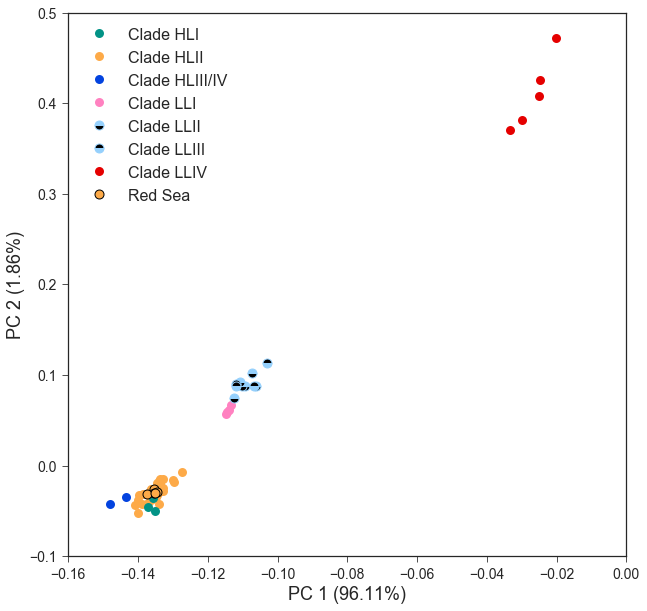

In [9]:
perc_explained = k**2 / (k**2).sum()

rs_false = np.array(df_genome_metadata_kmers['red_sea']==False)
rs_true = np.array(df_genome_metadata_kmers['red_sea']==True)
clade_HL1 = np.array(df_genome_metadata_kmers['clade']=='HLI')
clade_HL2 = np.array(df_genome_metadata_kmers['clade']=='HLII')
clade_HL3_HL4 = np.array((df_genome_metadata_kmers['clade']=='HLIII') | (df_genome_metadata_kmers['clade']=='HLIV'))
clade_LL1 = np.array(df_genome_metadata_kmers['clade']=='LLI')
clade_LL2 = np.array(df_genome_metadata_kmers['clade']=='LLII')
clade_LL3 = np.array(df_genome_metadata_kmers['clade']=='LLIII')
clade_LL4 = np.array(df_genome_metadata_kmers['clade']=='LLIV')

marker_rs = dict(color=sns.xkcd_rgb['light orange'], marker='o', markeredgewidth=1, markeredgecolor='black')

fig = plt.figure(figsize=(10, 10))
#plt.plot(u[rs_false, 0], u[rs_false, 1], 'ow', color=sns.xkcd_rgb['white'], label='Unassigned', markersize=9)
plt.plot(u[clade_HL1, 0], u[clade_HL1, 1], 'og', color=sns.xkcd_rgb['teal'], label='Clade HLI', markersize=9, zorder=10)
plt.plot(u[clade_HL2, 0], u[clade_HL2, 1], 'oy', color=sns.xkcd_rgb['light orange'], label='Clade HLII', markersize=9)
plt.plot(u[clade_HL3_HL4, 0], u[clade_HL3_HL4, 1], 'ob', color=sns.xkcd_rgb['blue'], label='Clade HLIII/IV', markersize=9)
plt.plot(u[clade_LL1, 0], u[clade_LL1, 1], 'om', color=sns.xkcd_rgb['pink'], label='Clade LLI', markersize=9)
plt.plot(u[clade_LL2, 0], u[clade_LL2, 1], 'oc', color=sns.xkcd_rgb['light blue'], label='Clade LLII', markersize=9, markerfacecoloralt='black', fillstyle=mlines.Line2D.fillStyles[4], markeredgewidth=1, markeredgecolor=sns.xkcd_rgb['light blue'])
plt.plot(u[clade_LL3, 0], u[clade_LL3, 1], 'oc', color=sns.xkcd_rgb['light blue'], label='Clade LLIII', markersize=9, markerfacecoloralt='black', fillstyle=mlines.Line2D.fillStyles[3], markeredgewidth=1, markeredgecolor=sns.xkcd_rgb['light blue'])
plt.plot(u[clade_LL4, 0], u[clade_LL4, 1], 'ok', color=sns.xkcd_rgb['red'], label='Clade LLIV', markersize=9)
plt.plot(u[rs_true, 0], u[rs_true, 1], 'or', label='Red Sea', markersize=9,  zorder=20, **marker_rs)
plt.xlabel('PC 1 ({:.2%})'.format(perc_explained[0]), fontsize=18)
plt.ylabel('PC 2 ({:.2%})'.format(perc_explained[1]), fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=16)
plt.axis([-.16, 0, -0.1, 0.5])
plt.savefig('ordination_of_%s_6mers_in_genomes.pdf' % species)

### Ordination of Pelagibacter genomes by 6-mer composition

In [10]:
species = 'pelag'
kmers = pd.read_csv('/Users/luke/singlecell/notebooks/jellyfish_%s_6mer.csv' % species, index_col=0) 

In [11]:
# calculate PCA on 6-mer counts + 1
mat = ilr(kmers+1)
u, k, v = np.linalg.svd(mat)

In [12]:
# import genome_metadata.tsv with index for jellyfish
df_genome_metadata = pd.read_csv('/Users/luke/singlecell/notebooks/genome_metadata.tsv', sep='\t', index_col=4)
df_genome_metadata_kmers = df_genome_metadata.loc[kmers.index]

In [13]:
df_genome_metadata_kmers['clade'].value_counts()

Ia      24
II       3
Id       3
Ib       2
IIIa     2
V        1
Name: clade, dtype: int64

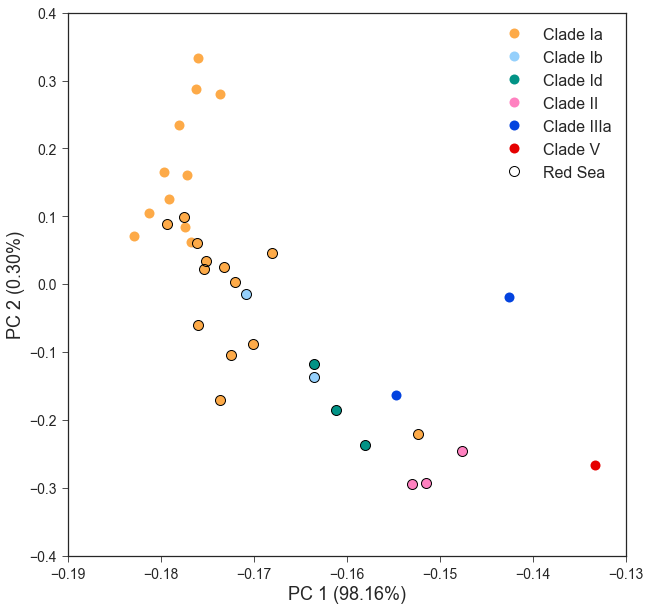

In [14]:
perc_explained = k**2 / (k**2).sum()

rs_false = np.array(df_genome_metadata_kmers['red_sea']==False)
rs_true = np.array(df_genome_metadata_kmers['red_sea']==True)
clade_Ia = np.array(df_genome_metadata_kmers['clade']=='Ia')
clade_Ib = np.array(df_genome_metadata_kmers['clade']=='Ib')
clade_Id = np.array(df_genome_metadata_kmers['clade']=='Id')
clade_II = np.array(df_genome_metadata_kmers['clade']=='II')
clade_IIIa = np.array(df_genome_metadata_kmers['clade']=='IIIa')
clade_V = np.array(df_genome_metadata_kmers['clade']=='V')

marker_rs = dict(color='none', marker='o', markeredgewidth=1, markeredgecolor='black')

fig = plt.figure(figsize=(10, 10))
#plt.plot(u[rs_false, 0], u[rs_false, 1], 'ow', color=sns.xkcd_rgb['white'], label='Unassigned genomes', markersize=10)
plt.plot(u[clade_Ia, 0], u[clade_Ia, 1], 'oy', color=sns.xkcd_rgb['light orange'], label='Clade Ia', markersize=10)
plt.plot(u[clade_Ib, 0], u[clade_Ib, 1], 'og', color=sns.xkcd_rgb['light blue'], label='Clade Ib', markersize=10)
plt.plot(u[clade_Id, 0], u[clade_Id, 1], 'og', color=sns.xkcd_rgb['teal'], label='Clade Id', markersize=10)
plt.plot(u[clade_II, 0], u[clade_II, 1], 'ob', color=sns.xkcd_rgb['pink'], label='Clade II', markersize=10)
plt.plot(u[clade_IIIa, 0], u[clade_IIIa, 1], 'om', color=sns.xkcd_rgb['blue'], label='Clade IIIa', markersize=10)
plt.plot(u[clade_V, 0], u[clade_V, 1], 'oc', color=sns.xkcd_rgb['red'], label='Clade V', markersize=10)
plt.plot(u[rs_true, 0], u[rs_true, 1], 'or', label='Red Sea', markersize=10, **marker_rs)
plt.xlabel('PC 1 ({:.2%})'.format(perc_explained[0]), fontsize=18)
plt.ylabel('PC 2 ({:.2%})'.format(perc_explained[1]), fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16, loc='upper right')
plt.axis([-.19, -.13, -0.4, 0.4])

# for label, x, y in zip(df_genome_metadata_kmers['strain'], u[:, 0], u[:, 1]):
#     plt.annotate(
#         label, 
#         xy = (x, y), xytext = (-10, 10),
#         textcoords = 'offset points', ha = 'right', va = 'bottom',
#         bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
#         arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.savefig('ordination_of_%s_6mers_in_genomes.pdf' % species)

#### The oddball among Ia is: N08

In [15]:
u[clade_Ia, 0]

array([-0.17676894, -0.18133771, -0.17912897, -0.18290835, -0.17364282,
       -0.17607881, -0.17630677, -0.17750144, -0.17968687, -0.17728269,
       -0.17809639, -0.17203731, -0.17543336, -0.17605133, -0.17758923,
       -0.17250638, -0.17522541, -0.16812665, -0.17368567, -0.15238466,
       -0.17612331, -0.17011173, -0.17323042, -0.17941902])

In [16]:
df_genome_metadata_kmers.index[df_genome_metadata_kmers['clade']=='Ia']

Index(['Pelub83DRAFT', 'HIMB140', 'HIMB4', 'CP003809', 'Ga0076703', 'HTCC1013',
       'Ga0076388', 'HTCC7211', 'HTC8051', 'HTCC9022', 'HTCC9565',
       'Pelagibacter_SCGC_AAA795-A08_contigs',
       'Pelagibacter_SCGC_AAA795-A20_contigs',
       'Pelagibacter_SCGC_AAA795-C09_contigs',
       'Pelagibacter_SCGC_AAA795-C10_contigs',
       'Pelagibacter_SCGC_AAA795-D22_contigs',
       'Pelagibacter_SCGC_AAA795-J21_contigs',
       'Pelagibacter_SCGC_AAA795-K18_contigs',
       'Pelagibacter_SCGC_AAA795-L23_contigs',
       'Pelagibacter_SCGC_AAA795-N08_contigs',
       'Pelagibacter_SCGC_AAA795-O19_contigs',
       'Pelagibacter_SCGC_AAA795-O20_contigs',
       'Pelagibacter_SCGC_AAA795-P11_contigs',
       'Pelagibacter_SCGC_AAA797-I19_contigs'],
      dtype='object', name='jellyfish')

### Ordination of Prochlorococcus genomes by OG composition -- subsampled with 1400 genes (keeps 5 of 5 SAGs)

In [17]:
def pca_ogs_proch(list_of_codes):

    species = 'proch'
    num_subsample = 1400
    
    for code in list_of_codes:
        ogs = pd.read_csv('/Users/luke/singlecell/notebooks/subsampled/matrix_pro_subsample_to_%s_%s_T.csv' % (num_subsample, code), index_col=0)

        # calculate PCA on OG counts + 1
        mat = ilr(ogs+1)
        u, k, v = np.linalg.svd(mat)

        # import genome_metadata.tsv with index for orthomcl-v4
        df_genome_metadata = pd.read_csv('/Users/luke/singlecell/notebooks/genome_metadata.tsv', sep='\t', index_col=3)
        df_genome_metadata_ogs = df_genome_metadata.loc[ogs.index]

        perc_explained = k**2 / (k**2).sum()

        rs_false = np.array(df_genome_metadata_ogs['red_sea']==False)
        rs_true = np.array(df_genome_metadata_ogs['red_sea']==True)
        clade_HL1 = np.array(df_genome_metadata_ogs['clade']=='HLI')
        clade_HL2 = np.array(df_genome_metadata_ogs['clade']=='HLII')
        clade_HL3_HL4 = np.array((df_genome_metadata_ogs['clade']=='HLIII') | (df_genome_metadata_kmers['clade']=='HLIV'))
        clade_LL1 = np.array(df_genome_metadata_ogs['clade']=='LLI')
        clade_LL2 = np.array(df_genome_metadata_ogs['clade']=='LLII')
        clade_LL3 = np.array(df_genome_metadata_ogs['clade']=='LLIII')
        clade_LL4 = np.array(df_genome_metadata_ogs['clade']=='LLIV')

        marker_rs = dict(color=sns.xkcd_rgb['light orange'], marker='o', markeredgewidth=1, markeredgecolor='black')

        fig = plt.figure(figsize=(10, 10))
        #plt.plot(u[rs_false, 0], u[rs_false, 1], 'ow', color=sns.xkcd_rgb['white'], label='Unassigned', markersize=9)
        plt.plot(u[clade_HL1, 0], u[clade_HL1, 1], 'og', color=sns.xkcd_rgb['teal'], label='Clade HLI', markersize=9, zorder=10)
        plt.plot(u[clade_HL2, 0], u[clade_HL2, 1], 'oy', color=sns.xkcd_rgb['light orange'], label='Clade HLII', markersize=9)
        plt.plot(u[clade_HL3_HL4, 0], u[clade_HL3_HL4, 1], 'ob', color=sns.xkcd_rgb['blue'], label='Clade HLIII/IV', markersize=9)
        plt.plot(u[clade_LL1, 0], u[clade_LL1, 1], 'om', color=sns.xkcd_rgb['pink'], label='Clade LLI', markersize=9)
        plt.plot(u[clade_LL2, 0], u[clade_LL2, 1], 'oc', color=sns.xkcd_rgb['light blue'], label='Clade LLII', markersize=9, markerfacecoloralt='black', fillstyle=mlines.Line2D.fillStyles[4], markeredgewidth=1, markeredgecolor=sns.xkcd_rgb['light blue'])
        plt.plot(u[clade_LL3, 0], u[clade_LL3, 1], 'oc', color=sns.xkcd_rgb['light blue'], label='Clade LLIII', markersize=9, markerfacecoloralt='black', fillstyle=mlines.Line2D.fillStyles[3], markeredgewidth=1, markeredgecolor=sns.xkcd_rgb['light blue'])
        plt.plot(u[clade_LL4, 0], u[clade_LL4, 1], 'ok', color=sns.xkcd_rgb['red'], label='Clade LLIV', markersize=9)
        plt.plot(u[rs_true, 0], u[rs_true, 1], 'or', label='Red Sea', markersize=9, zorder=20, **marker_rs)
        plt.xlabel('PC 1 ({:.2%})'.format(perc_explained[0]), fontsize=18)
        plt.ylabel('PC 2 ({:.2%})'.format(perc_explained[1]), fontsize=18)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.legend(fontsize=16, loc='lower right')

#         for label, x, y in zip(df_genome_metadata_ogs['strain'], u[:, 0], u[:, 1]):
#             plt.annotate(
#                 label, 
#                 xy = (x, y), xytext = (-10, 10),
#                 textcoords = 'offset points', ha = 'right', va = 'bottom',
#                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
#                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        
        plt.savefig('ordination_of_%s_OGs_subsampled_to_%s_%s_in_genomes.pdf' % (species, num_subsample, code))

        return(u, df_genome_metadata_ogs['clade'].value_counts())

In [18]:
codes_proch = ['QVCq'] # 'aJdx', 'kFiR', 'ojMZ', 'yxZb'

/Users/luke.thompson/.local/lib/python3.5/site-packages/ipykernel/__main__.py:35: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 93 but corresponding boolean dimension is 128


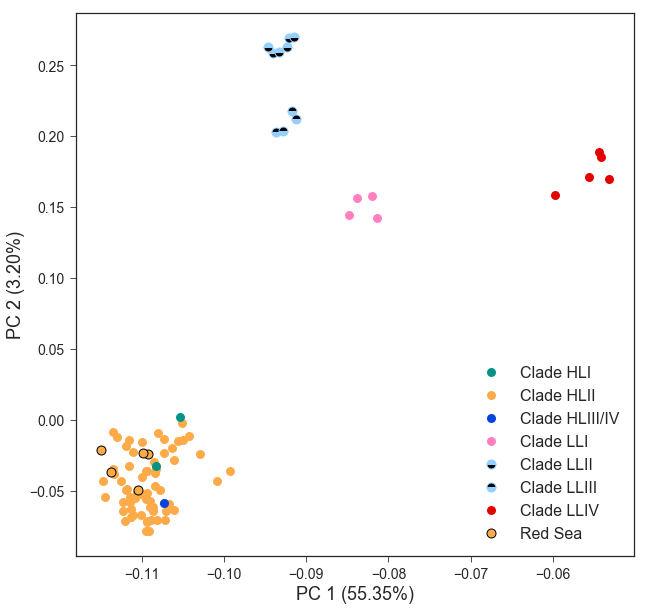

In [19]:
u, value_counts = pca_ogs_proch(codes_proch)

### Ordination of Pelagibacter genomes by OG composition -- subsampled with 800 genes (keeps 12 of 21 SAGs)

In [26]:
def pca_ogs_pelag(list_of_codes):

    species = 'pelag'
    num_subsample = 800
    
    for code in list_of_codes:
        ogs = pd.read_csv('/Users/luke/singlecell/notebooks/subsampled/matrix_sar_subsample_to_%s_%s_T.csv' % (num_subsample, code), index_col=0)

        # calculate PCA on OG counts + 1
        mat = ilr(ogs+1)
        u, k, v = np.linalg.svd(mat)

        # import genome_metadata.tsv with index for orthomcl-v4
        df_genome_metadata = pd.read_csv('/Users/luke/singlecell/notebooks/genome_metadata.tsv', sep='\t', index_col=3)
        df_genome_metadata_ogs = df_genome_metadata.loc[ogs.index]

        perc_explained = k**2 / (k**2).sum()

        rs_false = np.array(df_genome_metadata_ogs['red_sea']==False)
        rs_true = np.array(df_genome_metadata_ogs['red_sea']==True)
        clade_Ia = np.array(df_genome_metadata_ogs['clade']=='Ia')
        clade_Ib = np.array(df_genome_metadata_ogs['clade']=='Ib')
        clade_Ic = np.array(df_genome_metadata_ogs['clade']=='Ic')
        clade_Id = np.array(df_genome_metadata_ogs['clade']=='Id')
        clade_II = np.array(df_genome_metadata_ogs['clade']=='II')
        clade_IIIa = np.array(df_genome_metadata_ogs['clade']=='IIIa')
        #clade_V = np.array(df_genome_metadata_ogs['clade']=='V')

        marker_rs = dict(color='none', marker='o', markeredgewidth=1, markeredgecolor='black')

        fig = plt.figure(figsize=(10, 10))
        #plt.plot(u[rs_false, 0], u[rs_false, 1], 'ow', color=sns.xkcd_rgb['white'], label='Unassigned genomes', markersize=10)
        plt.plot(u[clade_Ia, 0], u[clade_Ia, 1], 'oy', color=sns.xkcd_rgb['light orange'], label='Clade Ia', markersize=10)
        plt.plot(u[clade_Ib, 0], u[clade_Ib, 1], 'og', color=sns.xkcd_rgb['light blue'], label='Clade Ib', markersize=10)
        plt.plot(u[clade_Ic, 0], u[clade_Ic, 1], 'oc', color=sns.xkcd_rgb['sunshine yellow'], label='Clade Ic', markersize=10)
        plt.plot(u[clade_Id, 0], u[clade_Id, 1], 'og', color=sns.xkcd_rgb['teal'], label='Clade Id', markersize=10)
        plt.plot(u[clade_II, 0], u[clade_II, 1], 'ob', color=sns.xkcd_rgb['pink'], label='Clade II', markersize=10)
        plt.plot(u[clade_IIIa, 0], u[clade_IIIa, 1], 'om', color=sns.xkcd_rgb['blue'], label='Clade IIIa', markersize=10)
        plt.plot(u[rs_true, 0], u[rs_true, 1], 'or', label='Red Sea', markersize=10, **marker_rs)
        plt.xlabel('PC 1 ({:.2%})'.format(perc_explained[0]), fontsize=18)
        plt.ylabel('PC 2 ({:.2%})'.format(perc_explained[1]), fontsize=18)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.legend(fontsize=16)
        plt.savefig('ordination_of_%s_OGs_subsampled_to_%s_%s_in_genomes.pdf' % (species, num_subsample, code))

        df_genome_metadata_ogs['clade'].value_counts()

In [27]:
codes_pelag = ['waLJ'] # 'fdPQ', 'pzAz', , 'yDKd', 'zmdV'

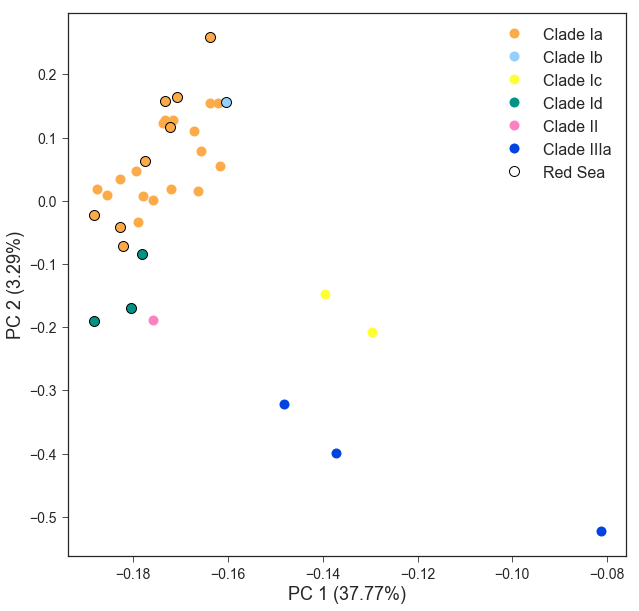

In [28]:
pca_ogs_pelag(codes_pelag)